In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt', 'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x7f9bd9e008e0>)

In [3]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x7f9bd9e00970>)

    IV. FORMAT OF "ghcnd-stations.txt"

    ------------------------------
    Variable   Columns   Type
    ------------------------------
    ID            1-11   Character
    LATITUDE     13-20   Real
    LONGITUDE    22-30   Real
    ELEVATION    32-37   Real
    STATE        39-40   Character
    NAME         42-71   Character
    GSN FLAG     73-75   Character
    HCN/CRN FLAG 77-79   Character
    WMO ID       81-85   Character
    ------------------------------

In [7]:
stations = np.genfromtxt('stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                         names=['id','latitude','longitude','elevation','state','name',
                                                'gsn','hcn','wmo'],
                                         dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                         autostrip=True)

In [8]:
len(stations)

125988

In [9]:
stations

array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

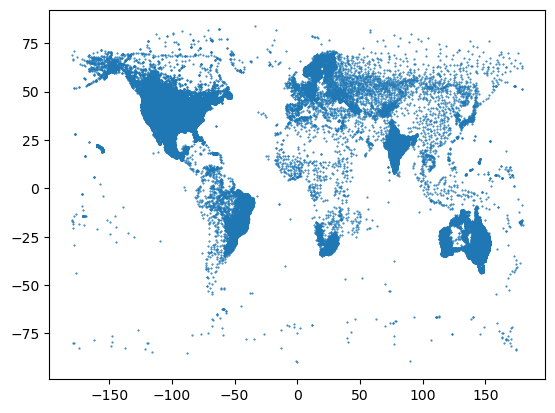

In [16]:
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)

In [18]:
stations_ky = stations[stations['state'] == 'KY']

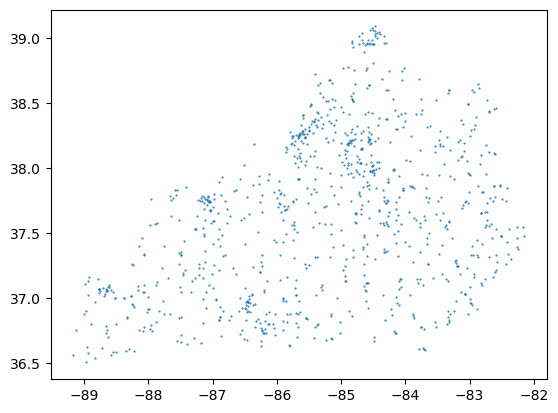

In [19]:
pp.plot(stations_ky['longitude'], stations_ky['latitude'], '.', markersize=1)

In [20]:
stations[stations['name'] == 'PADUCAH']

array([('USC00156115', 37.1   , -88.6167, 103.9, 'KY', 'PADUCAH', '', '', ''),
       ('USW00003816', 37.0683, -88.7719, 154.2, 'KY', 'PADUCAH', '', '', '72435')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [21]:
stations[np.char.find(stations['name'], 'PADUCAH') == 0]

array([('US1KYMK0003', 37.0631,  -88.6492,  131.7, 'KY', 'PADUCAH 1.0 SW', '', '', ''),
       ('US1KYMK0006', 37.019 ,  -88.683 ,  123.1, 'KY', 'PADUCAH 4.5 SW', '', '', ''),
       ('US1KYMK0008', 37.0857,  -88.6321,  103.9, 'KY', 'PADUCAH 0.9 NNE', '', '', ''),
       ('US1KYMK0010', 37.002 ,  -88.5182,  124.1, 'KY', 'PADUCAH 8.1 SE', '', '', ''),
       ('US1KYMK0012', 37.0697,  -88.6589,  133.8, 'KY', 'PADUCAH 1.3 W', '', '', ''),
       ('US1KYMK0014', 37.056 ,  -88.6488,  130.8, 'KY', 'PADUCAH 1.3 SSW', '', '', ''),
       ('US1KYMK0015', 37.0371,  -88.6708,  138.4, 'KY', 'PADUCAH 3.1 SW', '', '', ''),
       ('USC00156113', 37.0833,  -88.7   , -999.9, 'KY', 'PADUCAH LONE OAKS', '', '', ''),
       ('USC00156115', 37.1   ,  -88.6167,  103.9, 'KY', 'PADUCAH', '', '', ''),
       ('USC00156117', 37.05  ,  -88.55  ,  103.6, 'KY', 'PADUCAH WALKER BOAT YA', '', '', ''),
       ('USC00156122', 37.0667,  -88.5833, -999.9, 'KY', 'PADUCAH USE RSVN', '', '', ''),
       ('USC00156126', 37

In [24]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00156122.dly', 'PADUCAH.dly')

('PADUCAH.dly', <http.client.HTTPMessage at 0x7f9bc6b47ee0>)

In [28]:
import getweather

In [29]:
help(getweather.getyear)

Help on function getyear in module getweather:

getyear(station_name, elements, year)
    Make a NumPy record array of length 365, containing weather data
    at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
    restricted to year.
    
    If station_name is not in the list, find a station that _begins_
    with station_name, but give precedence to HCN and GSN stations.



In [32]:
getweather.getyear('LOUISVILLE', ['TMIN','TMAX'], 2000)

Using ('USC00225247', 33.1356, -89.0711, 177.1, 'MS', 'LOUISVILLE', '', 'HCN', '').


array([( 5. , 21.1), (10.6, 20.6), (15.6, 22.8), ( 4.4, 23.3),
       (-3.9, 23.3), (-3.9, 23.3), (-3.9, 23.3), ( 2.8, 15. ),
       ( 6.1, 17.8), ( 7.8, 20.6), ( 3.3, 20.6), ( 3.3, 21.1),
       ( 3.3, 21.1), (-2.2, 21.1), ( 1.1, 17.2), ( 4.4, 17.8),
       (10.6, 20.6), (12.2, 21.7), ( 6.7, 21.7), ( 6.7, 21.7),
       (-5.6, 11.7), (-3.3,  7.8), (-3.3, 13.9), ( 1.1,  5.6),
       (-5.6,  5.6), (-9.4,  6.7), (-5.6,  1.7), (-2.8,  5. ),
       ( 0. ,  2.2), (-2.8,  2.8), (-7.2,  6.7), (-5. ,  8.3),
       (-3.3, 12.8), (-6.1, 10. ), (-6.1, 17.8), (-6.1, 17.8),
       (-7.2, 17.8), (-7.2, 17.2), (-6.7, 17.8), (-1.7, 17.2),
       ( 7.8, 18.9), (12.8, 23.3), ( 7.8, 23.9), ( 5.6, 24.4),
       ( 5.6, 24.4), ( 4.4, 17.2), ( 6.7, 23.3), (10.6, 22.2),
       (10.6, 23.3), ( 5.6, 26.1), (-2.2,  7.2), (-1.1, 15. ),
       ( 5.6, 18.9), (-1.1, 22.8), (10. , 23.3), (10. , 23.3),
       (16.1, 22.8), ( 7.2, 25.6), ( 2.2, 18.3), ( 4.4, 20. ),
       (10. , 23.3), ( 6.7, 25. ), ( 8.9, 20. ), ( 7.2,